<a href="https://colab.research.google.com/github/Hrayyan/Business-Case-Yulu---Hypothesis-Testing/blob/main/Business_Case_Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT**

*    to understand the factors affecting the demand for shared electric cycles in the Indian market.




In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csv_path = "/content/yulu_bike_sharing.txt"
df = pd.read_csv(csv_path, delimiter=",")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [ ]:
cat_cols= ['season', 'holiday', 'workingday', 'weather']
df[cat_cols]=df[cat_cols].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
# minimum datetime and maximum datetime
print(df['datetime'].min(), df['datetime'].max())
# number of unique values in each categorical columns
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

2011-01-01 00:00:00 2012-12-19 23:00:00


value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

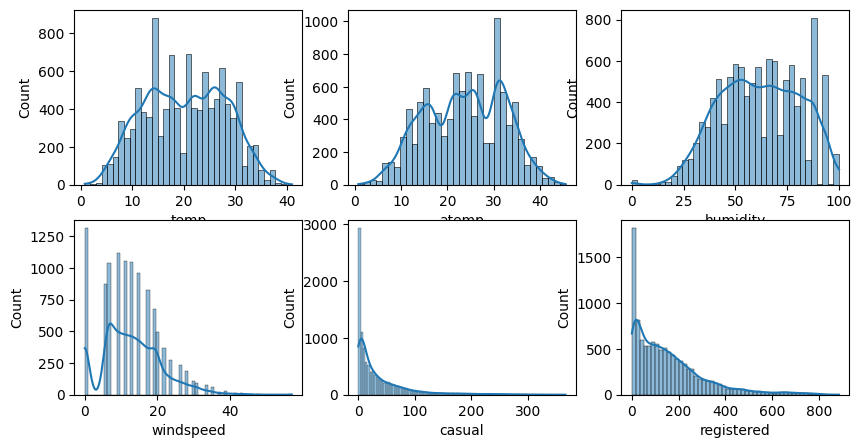

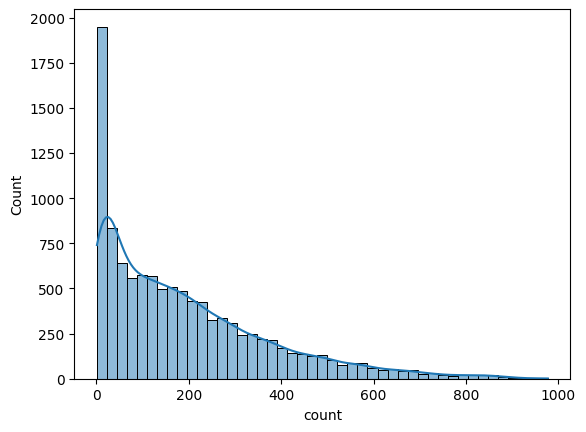

In [ ]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(df[num_cols[6]], kde=True)
plt.show()

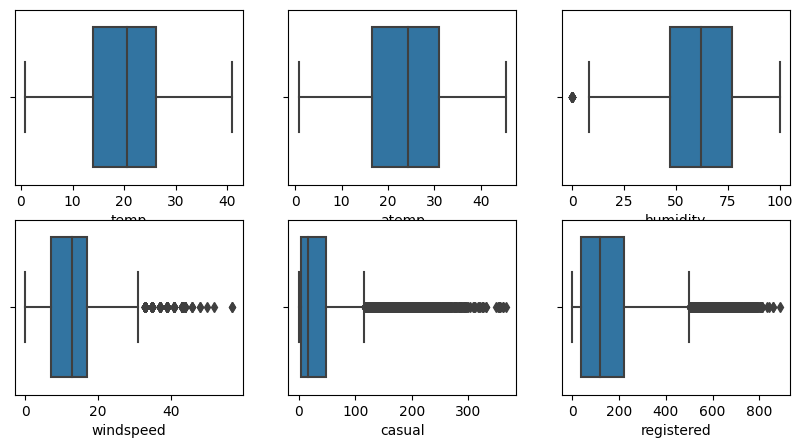

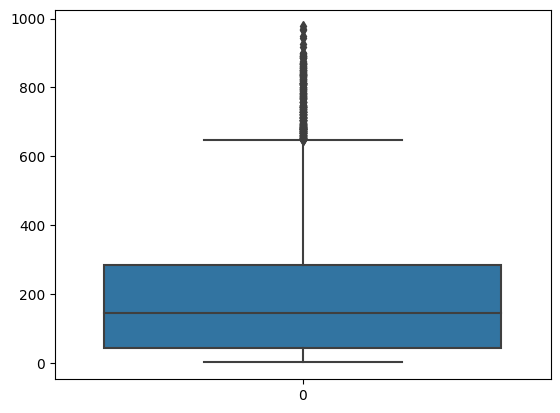

In [ ]:
# plotting box plots to detect outliers in the data
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1
plt.show()
sns.boxplot(df[num_cols[6]])
plt.show()



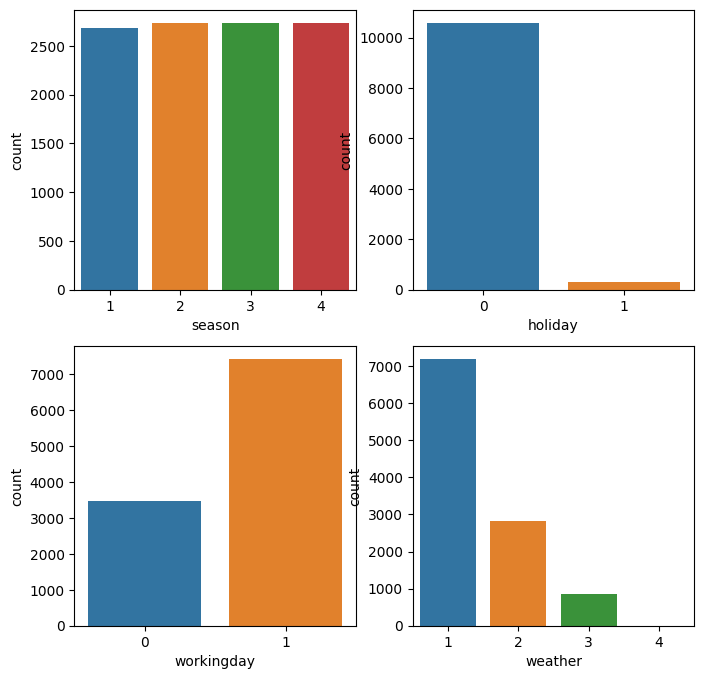

In [ ]:
# countplot of each categorical column
cat_cols= ['season', 'holiday', 'workingday', 'weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1

plt.show()

-> From the above countplot it can be noticed that working day has a significant impact on the number of cycles rented

-> Number of cycles rented are almost similar in all the 4 seasons

-> But in different weather the count is impacted it can be seen that most of the cycles are being rented in "Clear, Few clouds, partly cloudy, partly cloudy" wheather and almost zero in "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" which seems to be a natural behaviour


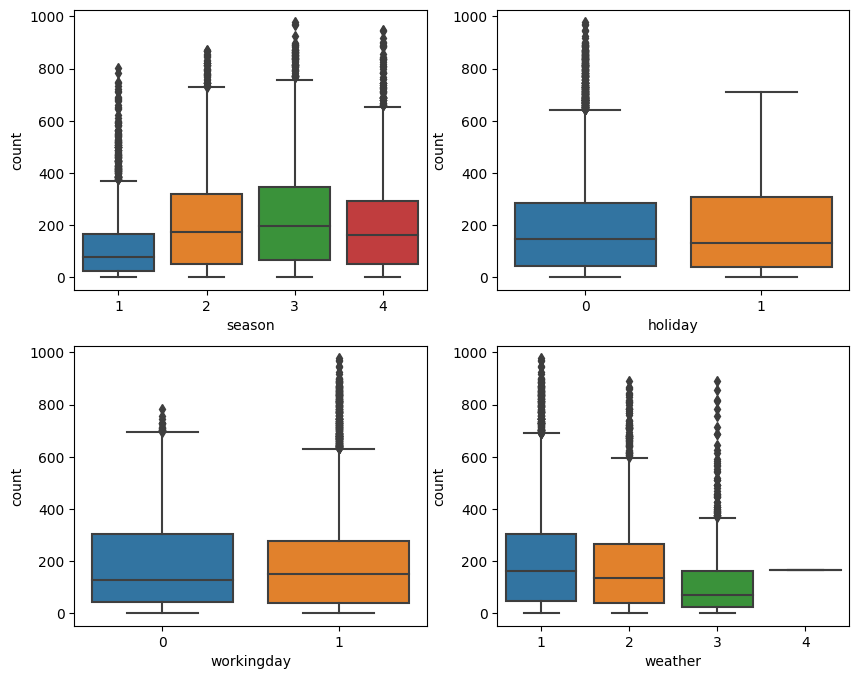

In [ ]:
# plotting categorical variables against count using boxplots
cat_cols= ['season', 'holiday', 'workingday', 'weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

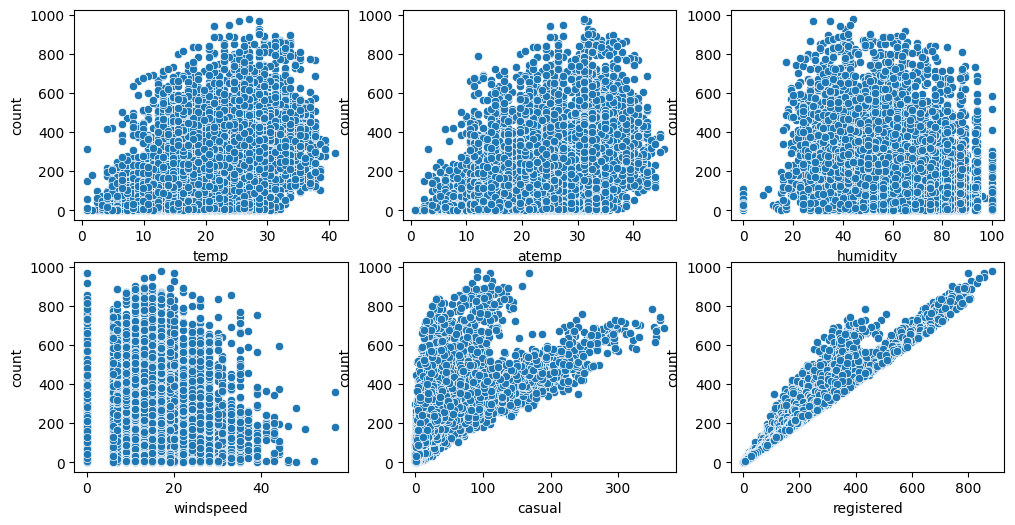

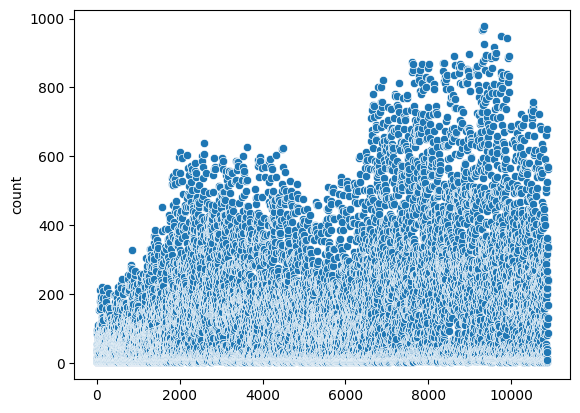

In [ ]:
# plotting numerical variables againt count using
num_cols=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()
sns.scatterplot(df[num_cols[6]])
plt.show()

<ipython-input-88-939b630f9d20>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


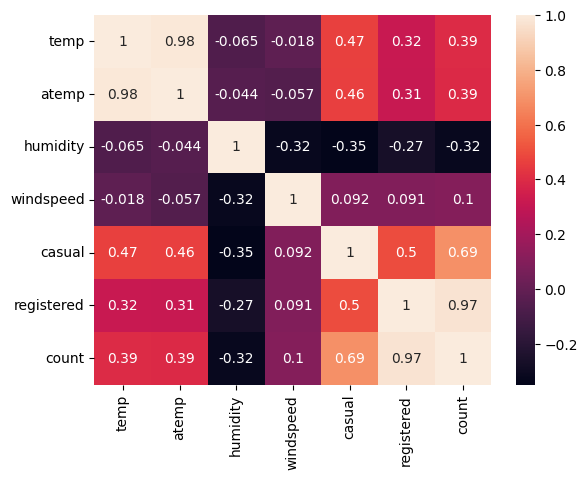

In [ ]:
# understanding the correlation between count of numerical variables i.e num vs num data
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# Now lets check whether Weather is dependent on season or not
#H0=weather is not dependent on the season
#Ha=weather is dependent on the season
data_table = pd.crosstab(df['season'], df['weather'])
print("observed values:")
data_table

observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
val=stats.chi2_contingency(data_table)
print(val)

Chi2ContingencyResult(statistic=49.158655596893624, pvalue=1.549925073686492e-07, dof=9, expected_freq=array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))


In [ ]:
expected_values = val[3]
expected_values

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [ ]:

chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, expected_values)])
chi_sqr

array([14.7368507 , 29.35756179,  2.01137639,  3.05286672])

In [ ]:
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
chi_sqr_statistic

44.09441248632364

In [ ]:
val = stats.chi2_contingency(data_table)
print(val)
expected_values = val[3]
print(expected_values)
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("Since p-value is less than the alpha 0.05, We reject the Null Hypothesis hence Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

Chi2ContingencyResult(statistic=49.158655596893624, pvalue=1.549925073686492e-07, dof=9, expected_freq=array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))
[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06
Since p-value is less than the alpha 0.05, We reject the Null Hypothesis hence Weather is dependent on the season.


In [ ]:
#now lets see if the working day has any impact on the number of cycles rented
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values

print(np.var(data_group1), np.var(data_group2))
np.var(data_group2)// np.var(data_group1)

30171.346098942427 34040.69710674686


1.0

In [ ]:
ttest=stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)
print(ttest)
print(pvalue)
if pvalue<0.05:
  print('working day has impact on the number of cycles rented')
else:
  print('working day has NO impact on the number of cycles rented')

TtestResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)
0.22644804226361348
working day has NO impact on the number of cycles rented


In [ ]:
# ANNOVA to check if No. of cycles rented is similar or different in different weather and season
from statsmodels.graphics.gofplots import qqplot
gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values
groups=[gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8]



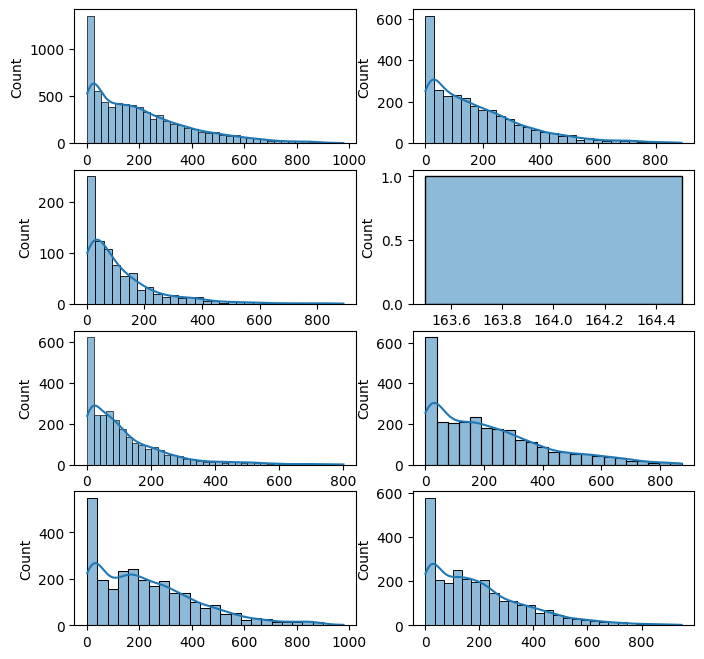

In [ ]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))

index = 0
for row in range(4):
    for col in range(2):
        sns.histplot(groups[index], ax=axis[row, col], kde=True)
        index += 1

plt.show()

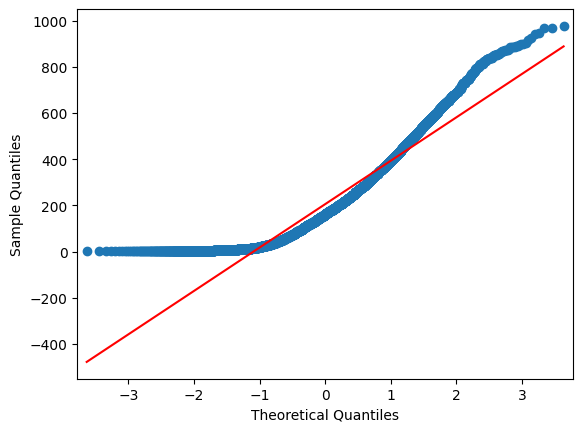

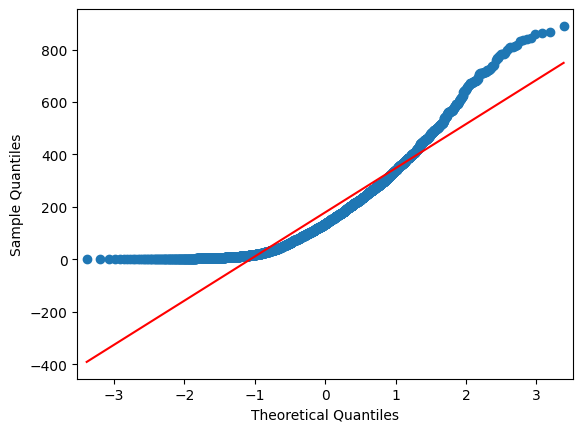

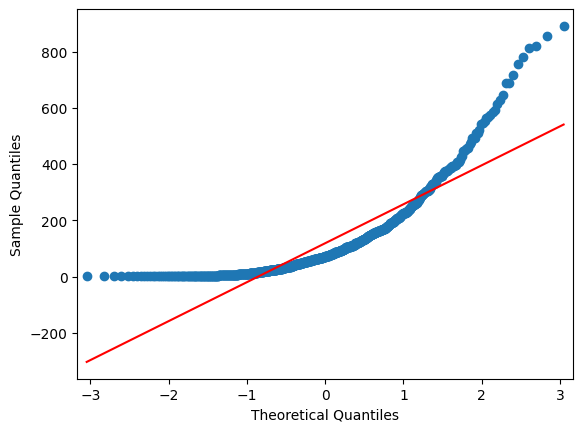

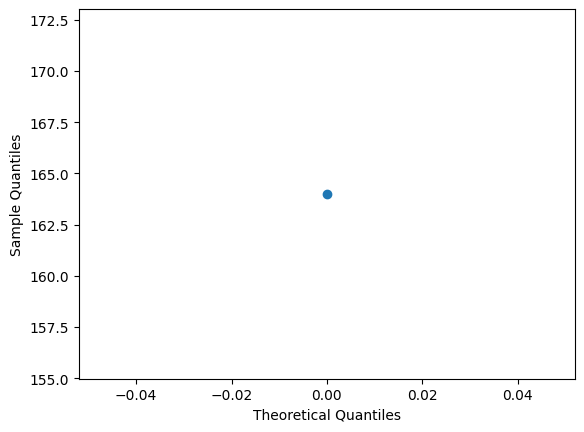

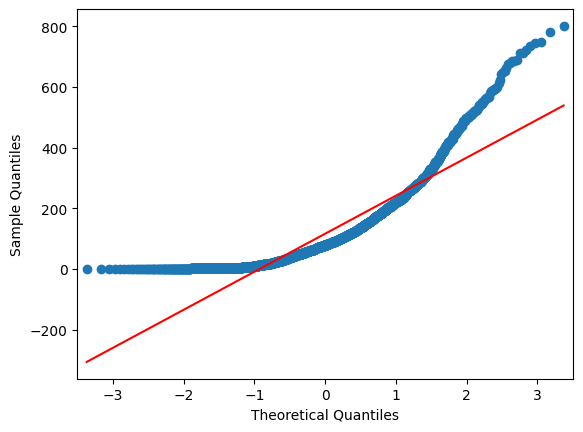

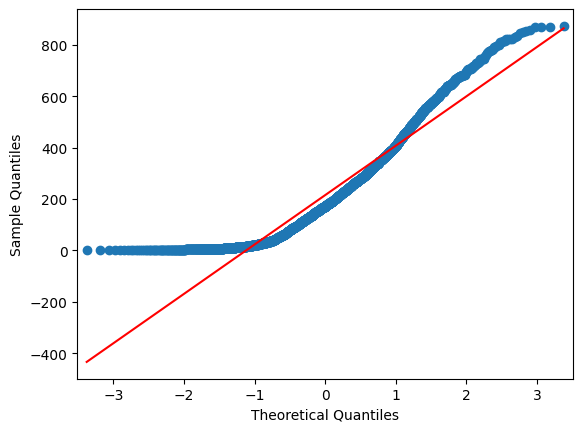

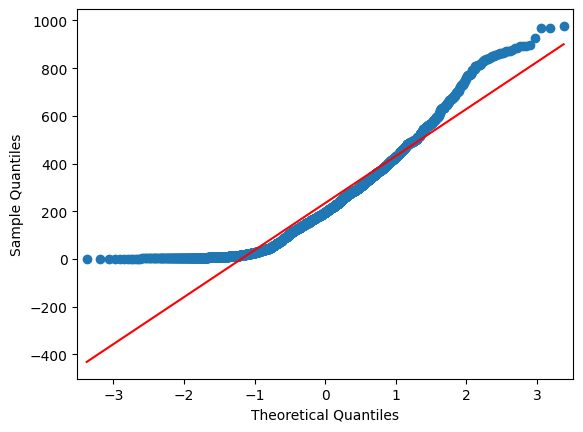

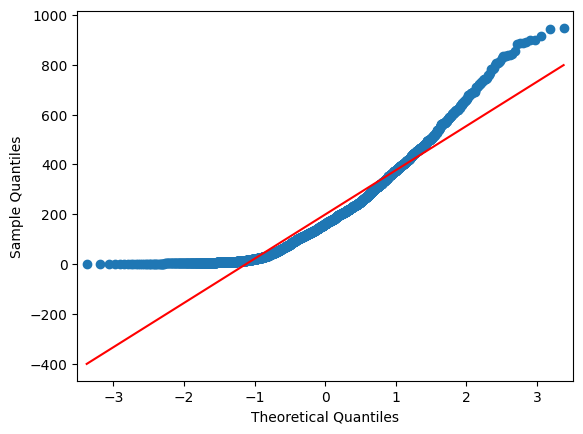

In [ ]:
index = 0
for row in range(4):
    for col in range(2):
        qqplot(groups[index], line="s")
        index += 1

plt.show()

In [ ]:
#H0: Variances is similar in different weather and season.

#HA: Variances is not similar in different weather and season.

#Significance level (alpha): 0.05
levene_stat, p_value = stats.levene(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)
print(p_value)
if p_value < 0.05:
    print("Reject the Null hypothesis.Variances are not equal")
else:
  print("Fail to Reject the Null hypothesis.Variances are  equal")

3.463531888897594e-148
Reject the Null hypothesis.Variances are not equal


In [ ]:
#assumptions of ANOVA don't hold, we need Kruskal Wallis
kruskal_stat, p_value = stats.kruskal(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)
print("p_value=",p_value)
if p_value<0.05:
  print("Since p-value is less than 0.05, we reject the null hypothesis hence variance is not equal")
else:
  print("fail to reject H0")

p_value= 4.614440933900297e-191
Since p-value is less than 0.05, we reject the null hypothesis hence variance is not equal


**INSIGHTS**


*   Approximately 19 out of every 100 users are classified as casual users, while the majority, around 81%, are registered users.
*   There's a noticeable surge in the mean hourly count of rental bikes, with figures rising from 144 in 2011 to 239 in 2012, reflecting an impressive annual growth rate of 65.41%.


*   Rental bike demand exhibits clear seasonal fluctuations, peaking during spring and summer months, experiencing a slight dip in fall, and further declining in winter.The months of January, February, and March register the lowest average hourly counts.

*   Over 80% of recorded instances report temperatures below 28 degrees Celsius.
Similarly, humidity levels predominantly exceed 40%, fluctuating between optimal and overly moist conditions.
Wind speed data reveals that more than 85% of observations fall below 20
*   Clear and cloudy weather conditions witness the highest rental counts, followed by misty conditions and rain, while records for extreme weather are scarce.
There's no significant difference in mean rental counts observed between working and non-working days.


*   Significant correlations exist between weather, season, and hourly rental counts, indicating varied influences across different weather and seasonal parameters.



**RECOMMENDATIONS**

*   Align marketing initiatives with seasonal demand patterns, focusing efforts during peak seasons like spring and summer. Introduce seasonal promotions to capitalize on increased demand.

*   Implement dynamic pricing strategies to leverage hourly fluctuations in rental demand. Adjust pricing to encourage rentals during off-peak hours while optimizing revenue during peak times.

*   Develop targeted promotions based on prevailing weather conditions, offering incentives during favorable weather such as clear or cloudy conditions.
*   Tailor marketing approaches for registered and casual users, offering personalized incentives and loyalty programs to registered users while ensuring a seamless experience for casual users.

*   Optimize inventory levels based on seasonal demand variations, ensuring adequate availability during peak periods while preventing excess stock during slower months


*   Allocate resources for seasonal bike maintenance to ensure fleet readiness, conducting thorough checks before peak seasons to prevent disruptions and enhance customer satisfaction.


